In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

%matplotlib inline

In [2]:
# Read the data set

df = pd.read_csv("spam.csv", encoding = "latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Drop the unwanted columns: "Unnamed: 2", "Unnamed: 3" and "Unnamed: 4"

df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = "columns", inplace = True)
df.rename(columns = {"v1" : "Label", "v2" : "SMS"}, inplace = True)
df.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.describe()

,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# Number of observations in each label, "spam" and "ham"

df["Label"].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [6]:
df["Length"] = df["SMS"].apply(len)
df.head()

,Label,SMS,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


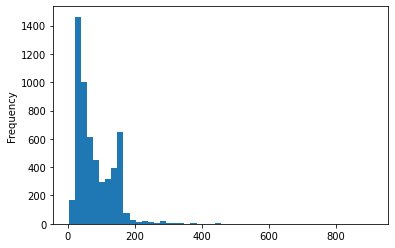

In [7]:
df["Length"].plot(bins = 50, kind = "hist")

# X-axis : Length
# y-axis : Frequency

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc93050ac8>,
      dtype=object)

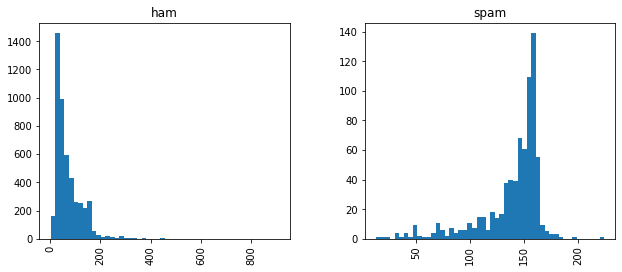

In [8]:
df.hist(column = "Length", by = "Label", bins = 50, figsize = (10, 4))

# X-axis : Length
# y-axis : Frequency

In [9]:
df.loc[ : , "Label"] = df["Label"].map({"ham" : 0, "spam" : 1})
df.head()

,Label,SMS,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df["SMS"], df["Label"], 
                                                    test_size = 0.25, random_state = 42)

In [11]:
# Instantiate the CountVectorizer method
cv = CountVectorizer()

# Fit the train data and then return the matrix
train_data = cv.fit_transform(X_train)

# Transform test data and return the matrix
test_data = cv.transform(X_test)

In [12]:
train_data.shape

(4179, 7441)

In [13]:
# MultinomialNB is suitable for classification with discrete features
# It takes in integer word counts as its input

clf = MultinomialNB()
clf.fit(train_data, y_train)

predictions = clf.predict(test_data)

In [14]:
# A score as close to 1 as possible is a good indicator of how well our model does

print(f'''Accuracy score : {accuracy_score(y_test, predictions)}
Precision score : {precision_score(y_test, predictions)}
Recall score : {recall_score(y_test, predictions)}
F1 score : {f1_score(y_test, predictions)}''')

Accuracy score : 0.9820531227566404
Precision score : 0.9825581395348837
Recall score : 0.8848167539267016
F1 score : 0.931129476584022


In [15]:
# Save the trained model

filename = "MultiNB_spam_model.pkl"
pickle.dump(clf, open(filename, "wb"))

# loaded_model = pickle.load(open(filename, "rb"))    # Load the model